# Import all data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sms
import matplotlib.pyplot as plt

from scipy.stats import zscore

In [3]:
bankloan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bankloan.columns = ['ID','Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']

# Understand the data and perform Exploratory Data Analytics

In [4]:
bankloan.shape

(5000, 14)

In [5]:
bankloan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bankloan.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

The fields Education, SecuritiesAccount, CDAccount, Online, CreditCard are all shown as integers even though they are categorical variables. Hence, prior to performing the modelling of the data, these fields should be transformed into dummy variables to prevent any interference with the model

In [7]:
bankloan['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

    The number of customers who have availed personal loans is just 9.6% of the total sample. This may impact of classification of the minority case (i.e. the customers availing the personal loan). Further, in this case, the accuracy score alone may not be reliable and we will have to depend on the confusion matrix to get a better understanding of the model performance

In [8]:
bankloan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The fields age, Experience and Education have their means relatively close to the Median (50% cutoff) indicating a relatively unskewed distribution. However, Mortgage seems to be heavily skewed to the right since the mean is quite further to the right than the median


Experience of any person cannot be negative. Hence, the 'Experience' field of these samples will need to be updated

#### Trying to update the most relevant values of Experience in the appropriate fields

In [9]:
bankloan[bankloan['Experience']<0].count()

ID                   52
Age                  52
Experience           52
Income               52
ZIPCode              52
Family               52
CCAvg                52
Education            52
Mortgage             52
PersonalLoan         52
SecuritiesAccount    52
CDAccount            52
Online               52
CreditCard           52
dtype: int64

In [10]:
bankloan.corr(method='pearson')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Age has a 0.994 correlation against experience. All other parameters have a correlation of less than +- 0.1 with Experience and hence cannot be considered. Hence, we will use the Age dimension to update the negative values of Experience

Further, we see that there is some correlation between CCavg and Income (0.65) as well as Personal Loan and Income (0.5)

Attempt 1: Using linear regression across select variable

In [11]:
ageexp=bankloan[['ID','Experience','Age']].copy() #Creating a copy to prevent any errors in primary table

In [12]:
ageexpprop=ageexp[ageexp.Experience >=0].copy() #Create a dataframe for age and experience dimensions for legitimate values of experience
ageexpimprop=ageexp[ageexp.Experience <0].copy()  #Create a dataframe for age and experience dimensions for incorrect values of experience

In [13]:
#Obtaining a and b for y = ax+b where y = Experience and x = Age
X = ageexpprop['Age'].copy()
Y = ageexpprop['Experience'].copy()
Denom = X.dot(X)-X.mean()*X.sum()
a=(X.dot(Y)-Y.mean()*X.sum())/Denom
b=(Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/Denom

#checking R2 error as 1 - (SSres / SStotal)
Yhat=a*X+b
e1 = Y - Yhat
e2 = Y - Y.mean()
R2 = 1 - (e1.dot(e1)/e2.dot(e2))
print('the best fit linear regression for Experience is: ',a,'* Age + ',b,' which gives a R-squared error of: ',R2)

the best fit linear regression for Experience is:  0.993332050115479 * Age +  -24.922378888617843  which gives a R-squared error of:  0.9882377704069136


In [14]:
ageexpimprop['Experience']=a*ageexpimprop['Age']+b
ageexpimprop[ageexpimprop['Experience']<0].count()
ageexpimprop

,ID,Experience,Age
89,90,-0.089078,25
226,227,-1.082410,24
315,316,-1.082410,24
451,452,2.890919,28
524,525,-1.082410,24
536,537,-0.089078,25
540,541,-0.089078,25
576,577,-0.089078,25
583,584,-1.082410,24
597,598,-1.082410,24


Since the best fit linear regression also creates negative values for Experience, the same cannot be considered

Attempt 2: Median values based on experience
In this attempt, we will create two tables - Table 1: one with all legitimate candidates with legitimate experience (Experience >=0) and Table2: incorrectly populated experience. For each value of Age in Table 2, we will calculate the median of the experience from Table 1 rows having the same Age. 

In [15]:
ageexpprop=ageexp[ageexp.Experience >=0].copy()
ageexpimprop=ageexp[ageexp.Experience <0].copy()
bankloan.loc[bankloan['Age']==23, 'Experience']

670    -1
909    -1
2430   -1
2618   -3
2717   -2
2962   -2
3130   -2
3157   -1
3425   -1
3824   -1
4285   -3
4411   -2
Name: Experience, dtype: int64

As we can see, for all 12 entries with Age 23 in the bankloan dataframe, the experience is a negative number. Hence, we will treat these cases separately

In [16]:
ageexpimprop1 = ageexpimprop.copy() #Creating a duplicate table to prevent errors
#First for loop is for values where age <> 23
for i in range(ageexpimprop['Experience'].size):
    if((ageexpimprop['Age'].values[i] < 23) or (ageexpimprop['Age'].values[i] > 23)):
        Exp1 =  ageexpprop.loc[ageexpprop['Age'] == ageexpimprop['Age'].values[i],'Experience']
        age1 = Exp1.median()
        ageexpimprop1['Experience'].values[i]=age1
#Second for loop is for values where age=23
age2=ageexpimprop1['Experience'].mean()
for i in range(ageexpimprop['Experience'].size):
    if(ageexpimprop['Age'].values[i] == 23):
           ageexpimprop1['Experience'].values[i]=age2

In [17]:
bankloan1=bankloan.copy()
bankloan1

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [18]:
#Creating a copy of the original dataframe bankloan to demonstrate that all negative values have been covered
for i in range(ageexpimprop1['ID'].size):
    bankloan1.loc[bankloan1['ID'] == ageexpimprop1['ID'].values[i], 'Experience'] = ageexpimprop1['Experience'].values[i]

In [19]:
bankloan1.loc[bankloan1['Experience']<0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard


Hence, we can see that the bankloan1 DataFrame no longer has any data where the Experience values are negative

__We will now perform remaining EDA on **bankloan1 Dataframe**__

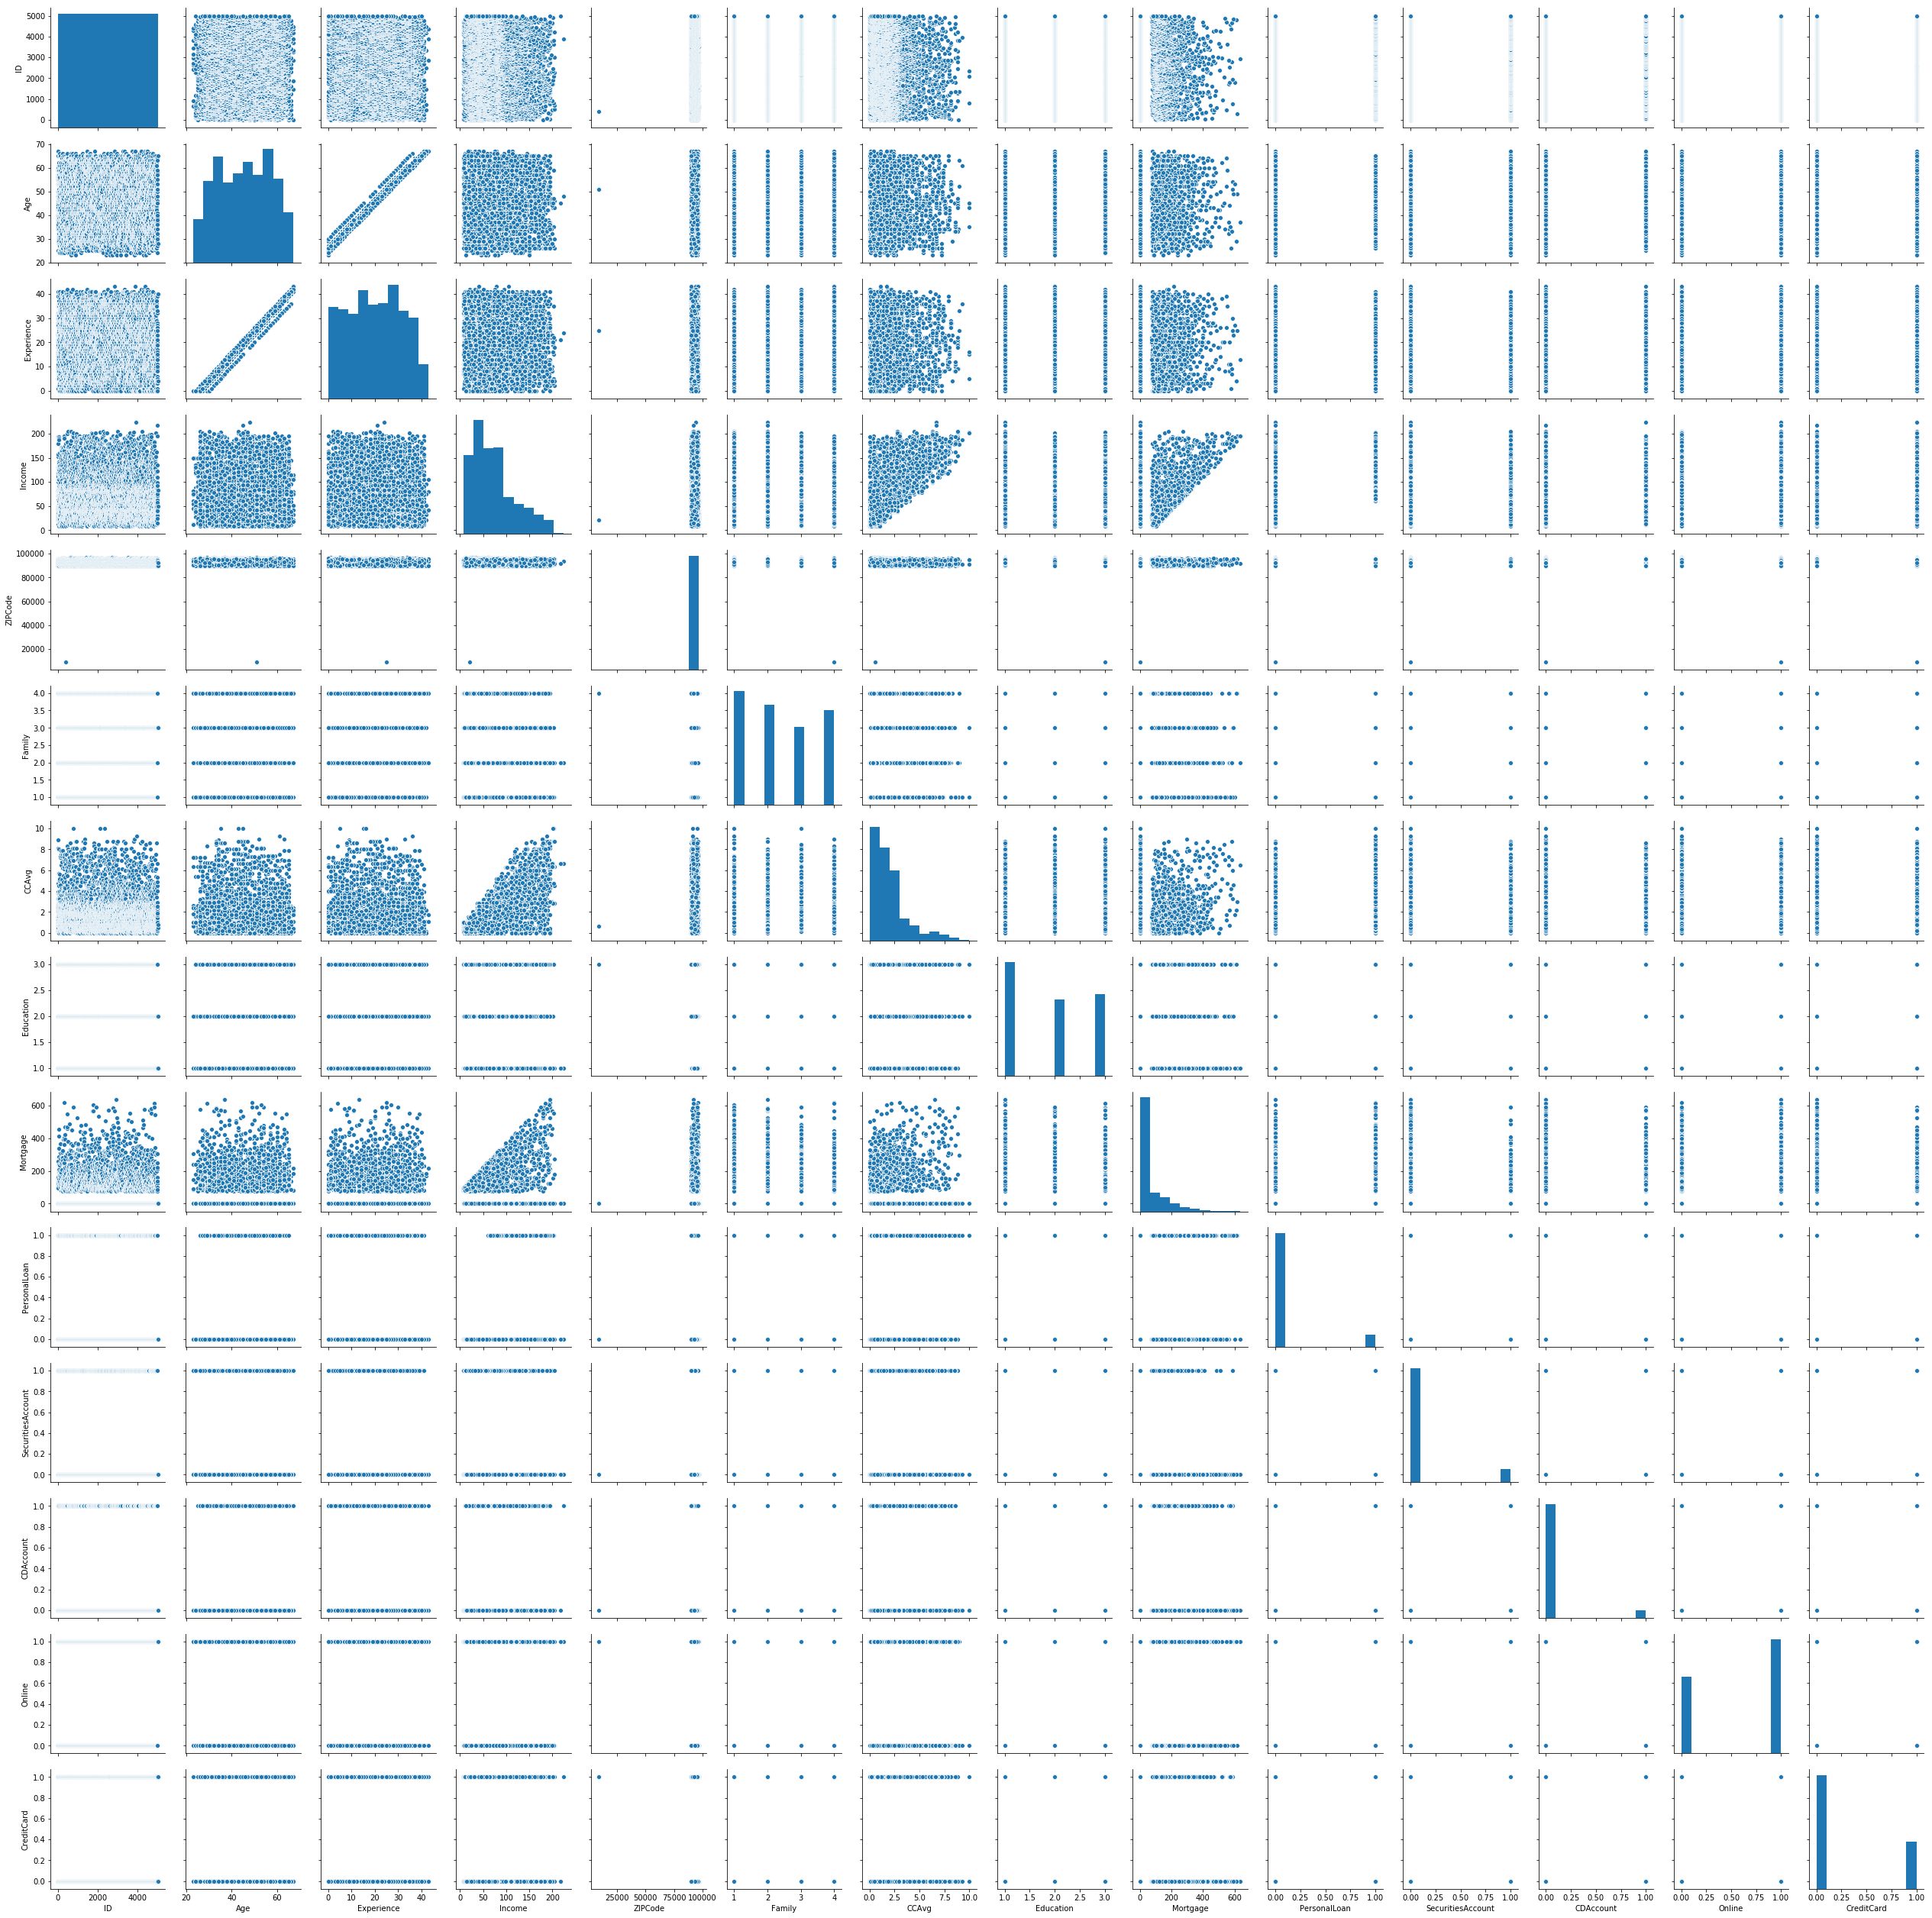

In [20]:
sms.pairplot(bankloan1)

Age and Experience are normally distributed with minimal skew but seem to have multiple Gaussians in their data. We will need to take care of the same going forward. 
Income, CCAverage and Mortgage are heavily skewed to the right indicating the presence of outliers in the data

In [21]:
bankloan1.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

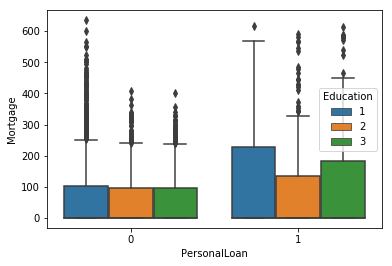

In [23]:
sms.boxplot(x='PersonalLoan',y='Mortgage', hue='Education', data=bankloan1)

There seems to be some relation between Mortgage amount taken and potential to take a Personal Loan. This is especially clearer in the Education=1 and Education=3 columns

Further, there are outliers in the distribution of the Mortgage data

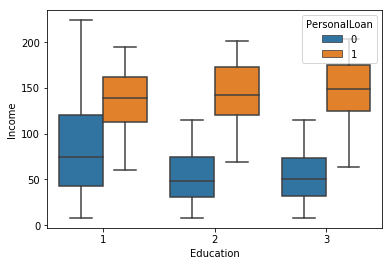

In [24]:
sms.boxplot(x='Education',y='Income', hue='PersonalLoan', data=bankloan1)

There seems to be some relation between Income and Personal Loan. However, no major trend stands out between Higher Education and Income

##### Checking if Gaussians observed in the pairplot diagonals can be segregated by PersonalLoan

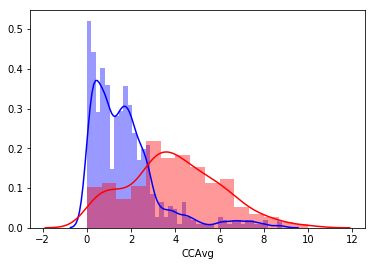

In [25]:
sms.distplot( bankloan1[bankloan1.PersonalLoan == 0]['CCAvg'], color = 'b')
sms.distplot( bankloan1[bankloan1.PersonalLoan == 1]['CCAvg'], color = 'r')

Atleast one of the Gaussians on the CCAvg data pertains to PersonalLoan. 
Based on the segregation, while most customers have a lower CCAvg around 0.5 ('000), the customers with higher CCAvg values have also taken up more PersonalLoans

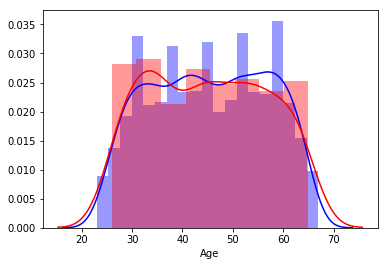

In [26]:
sms.distplot( bankloan1[bankloan1.PersonalLoan == 0]['Age'], color = 'b')
sms.distplot( bankloan1[bankloan1.PersonalLoan == 1]['Age'], color = 'r')

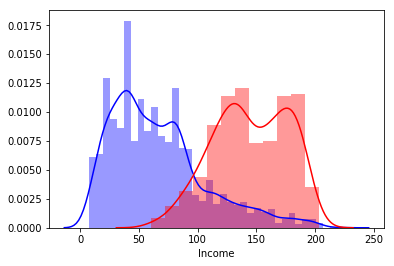

In [27]:
sms.distplot( bankloan1[bankloan1.PersonalLoan == 0]['Income'], color = 'b')
sms.distplot( bankloan1[bankloan1.PersonalLoan == 1]['Income'], color = 'r')

There is a clear trend that as PersonalLoans are availed of as income increases though there is some overlap on the same between 50K to 100K income range

Further, we also will need to drop the nominal variables in the data set - ID and ZipCode prior to modelling the data

# Initiating the categorization, testing and training process for the data

## Creating dummy variables

In [28]:
df_Education = pd.get_dummies(bankloan1['Education'])
df_Education.columns = ['Education-Undergrad','Education-Graduate','Education-Advanced']
df_Education[['Education-Undergrad','Education-Graduate','Education-Advanced','Education-Undergrad','Education-Graduate','Education-Advanced']] = df_Education[['Education-Undergrad','Education-Graduate','Education-Advanced','Education-Undergrad','Education-Graduate','Education-Advanced']].astype(str)

In [29]:
df_CDAccount = pd.get_dummies(bankloan1['CDAccount'])
df_CDAccount.columns=['CDAccount-No','CDAccount-Yes']
df_CDAccount[['CDAccount-No','CDAccount-Yes']] = df_CDAccount[['CDAccount-No','CDAccount-Yes']].astype(str)
df_CDAccount.dtypes

CDAccount-No     object
CDAccount-Yes    object
dtype: object

In [30]:
df_SecuritiesAccount = pd.get_dummies(bankloan1['SecuritiesAccount'])
df_SecuritiesAccount.columns=['SecuritiesAccount-No','SecuritiesAccount-Yes']
df_SecuritiesAccount[['SecuritiesAccount-No','SecuritiesAccount-Yes']]=df_SecuritiesAccount[['SecuritiesAccount-No','SecuritiesAccount-Yes']].astype(str)

In [31]:
df_Online = pd.get_dummies(bankloan1['Online'])
df_Online.columns=['Online-No','Online-Yes']
df_Online[['Online-No','Online-Yes']]=df_Online[['Online-No','Online-Yes']].astype(str)

In [32]:
df_CreditCard = pd.get_dummies(bankloan1['CreditCard'])
df_CreditCard.columns=['CreditCard-No','CreditCard-Yes']
df_CreditCard[['CreditCard-No','CreditCard-Yes']]=df_CreditCard[['CreditCard-No','CreditCard-Yes']].astype(str)

In [33]:
Bankloan_final=pd.concat([bankloan1,df_Education,df_CDAccount,df_SecuritiesAccount, df_Online, df_CreditCard],axis=1)

In [34]:
Bankloan_final=Bankloan_final.drop(Bankloan_final[['ZIPCode','Education','CDAccount','SecuritiesAccount','Online','CreditCard']],axis=1)

## Defining the train and test data

In [35]:
from sklearn.model_selection import train_test_split
Master_Data = Bankloan_final.copy()

In [36]:
Master_Data = Master_Data.drop(labels = 'ID', axis = 1) #ID need not be used for the categorization
X_parent = Master_Data.drop(labels = "PersonalLoan", axis = 1) #PersonalLoan is my target variable
Y_parent = Master_Data['PersonalLoan'] #Extracting target variable
X_parent.shape, Y_parent.shape

((5000, 17), (5000,))

In [37]:
#Converting all numeric values to z-scores. 
X_parent_z = X_parent.copy()
X_parent_z[['Age','Experience','Income','Family','CCAvg','Mortgage']] = X_parent[['Age','Experience','Income','Family','CCAvg','Mortgage']].apply(zscore)

In [38]:
#Getting the test data set for Z-scored data
X=np.array(X_parent_z)
Y=np.array(Y_parent)
X.shape, Y.shape

((5000, 17), (5000,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)
unique, counts = np.unique(y_train, return_counts=True)
unique1, counts1 = np.unique(y_test, return_counts=True)
dict(zip(unique, counts)),dict(zip(unique1, counts1))

({0: 3171, 1: 329}, {0: 1349, 1: 151})

The test and the train date both have around 9.4% of their samples as those who availed the loan. Hence, 

## KNN

### Training the set under KNN

In [40]:
#FOR Z-SCALED VALUES
from sklearn.neighbors import KNeighborsClassifier
# Running the KNN algorithm with weights as 'Distance' between 1 and 150 neighbours to identify the best fit based on maximum score
N=150
ka=pd.DataFrame(columns=['Score', 'Neighbours'])
ka[['Score','Neighbours']]=ka[['Score','Neighbours']].astype(int)
i = 0
for i in range(N-1):
    knn = KNeighborsClassifier(n_neighbors= i+1 , weights = 'distance')
    knn.fit(X_train, y_train)    
    predicted_labels = knn.predict(X_test)
    ka.at[i,'Score']=knn.score(X_test, y_test)
    ka.at[i,'Neighbours']=i+1
    
Neighbour_max=ka.loc[ka['Score']== ka['Score'].max(), ['Neighbours']]
Score_max=ka.loc[ka['Score']== ka['Score'].max(), ['Score']]
Neighbour_max, Score_max
#Finding predicted labels for N=3 (maximum score)
knn = KNeighborsClassifier(n_neighbors=3 , weights = 'distance')
knn.fit(X_train, y_train) 
predicted_labels = knn.predict(X_test)

In [41]:
# Running the KNN algorithm with weights as 'Uniform' between 1 and 150 neighbours to identify the best fit based on maximum score
N1=150
kb=pd.DataFrame(columns=['Score', 'Neighbours'])
kb[['Score','Neighbours']]=kb[['Score','Neighbours']].astype(int)
i = 0
for i in range(N1-1):
    knn1 = KNeighborsClassifier(n_neighbors= i+1 , weights = 'uniform')
    knn1.fit(X_train, y_train)    
    predicted_labels1 = knn1.predict(X_test)
    kb.at[i,'Score']=knn1.score(X_test, y_test)
    kb.at[i,'Neighbours']=i+1
    
Neighbour_max1=kb.loc[kb['Score']== kb['Score'].max(), ['Neighbours']]
Score_max1=kb.loc[kb['Score']== kb['Score'].max(), ['Score']]
Neighbour_max1, Score_max1
#Finding predicted labels for N=3 (maximum score)
knn1 = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform')
knn1.fit(X_train, y_train) 
predicted_labels1 = knn1.predict(X_test)

### Confusion Matrix for KNN model

In [42]:
#confusion matrix for KNN model with weights = 'Distance' and Z-scaled values
from sklearn import metrics
print('Classification Report: \n')
print(metrics.classification_report(y_test, predicted_labels))
print("Confusion Matrix: \n")
print(metrics.confusion_matrix(y_test, predicted_labels))

Classification Report: 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1349
           1       0.95      0.64      0.77       151

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

Confusion Matrix: 

[[1344    5]
 [  54   97]]


In [43]:
#Confusion matrix for KNN model with weights = ' Uniform' and Z-scaled values
from sklearn import metrics
print('Classification Report: \n')
print(metrics.classification_report(y_test, predicted_labels1))
print("Confusion Matrix: \n")
print(metrics.confusion_matrix(y_test, predicted_labels1))

Classification Report: 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1349
           1       0.94      0.64      0.76       151

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.95      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

Confusion Matrix: 

[[1343    6]
 [  55   96]]


## Naive Bayes

### Training the set under Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
predicted = model.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)


#### Confusion Matrix for Naive Bayes

In [45]:
print("Classification Report :\n")
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix :\n")
print(metrics.confusion_matrix(y_test, predicted))

Classification Report :

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1349
           1       0.50      0.59      0.54       151

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.91      0.90      0.90      1500

Confusion Matrix :

[[1260   89]
 [  62   89]]


## Logistic Regression

### Training the set under Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print('Model score is :',model_score)

coef_df = pd.DataFrame(model.coef_, columns=X_parent.columns )
coef_df['intercept'] = model.intercept_
print(coef_df)



Model score is : 0.9546666666666667
        Age  Experience    Income    Family     CCAvg  Mortgage  \
0 -0.110073    0.242361  2.858613  0.680341  0.313316  0.074136   

   Education-Undergrad  Education-Graduate  Education-Advanced  CDAccount-No  \
0            -3.158714            1.139971            0.974873     -2.418519   

   CDAccount-Yes  SecuritiesAccount-No  SecuritiesAccount-Yes  Online-No  \
0       1.374649             -0.171596              -0.872274   -0.20106   

   Online-Yes  CreditCard-No  CreditCard-Yes  intercept  
0    -0.84281      -0.062951       -0.980918   -1.04387  


C:\Users\swaminathan.kannan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Confusion Matrix for Logistic Regression

Classification Report :

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1349
           1       0.82      0.71      0.76       151

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.85      0.87      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix :

[[1325   24]
 [  44  107]]


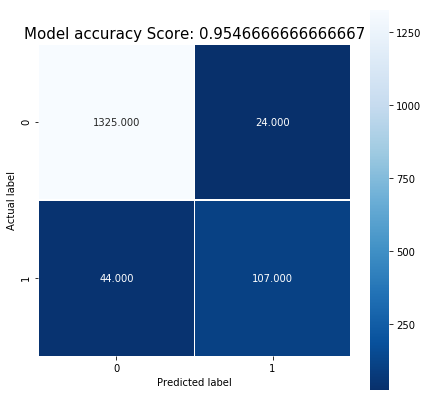

In [47]:
print("Classification Report :\n")
print(metrics.classification_report(y_test, y_predict))
print("Confusion Matrix :\n")
cm = metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))

plt.figure(figsize=(7,7))
sms.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Model accuracy Score: {0}'.format(model_score)
plt.title(all_sample_title, size = 15);

# Conclusion

Overall, there is no clear model that provides the F1-score to give us complete comfort on the robustness of the model. However, between the three main models, the Logistic Regression model and the KNN model (with weights=distance) are the best fitx. Logistic Regression has an accuracy score of 0.95 and also provides a Precision of 0.82 and Recall of 0.71 for case1: who are higher potential targets for Personal Loans through new campaigns. This also gives us an F1-score of 0.76. Similarly, KNN also has a F1-score of 0.77 with a Precision score of 0.95 but a lower Recall score of 0.64. Given that the KNN modelling process followed may have a risk of overfitting the existing test / train datasets, I would recommend going ahead with the Logistics Regression model with a more balanced Precision/ Recall ratio